In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [40]:
#Data Exploration

In [41]:
hr_data=pd.read_csv("CourseworkData.csv")
hr_data.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1248,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,...,3,80,1,6,3,3,5,2,0,2
1,872,24,Yes,Travel_Rarely,984,Research & Development,17,2,Life Sciences,1,...,1,80,1,1,3,1,1,0,0,0
2,610,43,No,Travel_Rarely,589,Research & Development,14,2,Life Sciences,1,...,3,80,1,22,3,3,4,1,1,0
3,1092,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,...,4,80,0,5,2,3,5,3,0,2
4,976,55,Yes,Travel_Rarely,267,Sales,13,4,Marketing,1,...,3,80,0,24,2,2,19,7,3,8


In [42]:
hr_data.isnull().sum()

Unnamed: 0                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
Starting Salary             0
Current Salary              0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [43]:
hr_data.dtypes

Unnamed: 0                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
Starting Salary              int64
Current Salary               int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [44]:

#Columns of dataset
hr_data.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'Starting Salary', 'Current Salary',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
#For this exercise, our aim is predict the employee attrition. It is important to see which variables are contibuting the most in attrition. But before that we need to know if the variable are any where correlated i.e Data ExplorationThere are many continuous variables where the we can have a look at their distribution and create a grid of pairplot but that would be too much as there are so mnay variables.

In [56]:
#Lets create a dataframe with only numeric variables
hr_data_num = hr_data[['DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction',
                         'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager','Age']].copy()

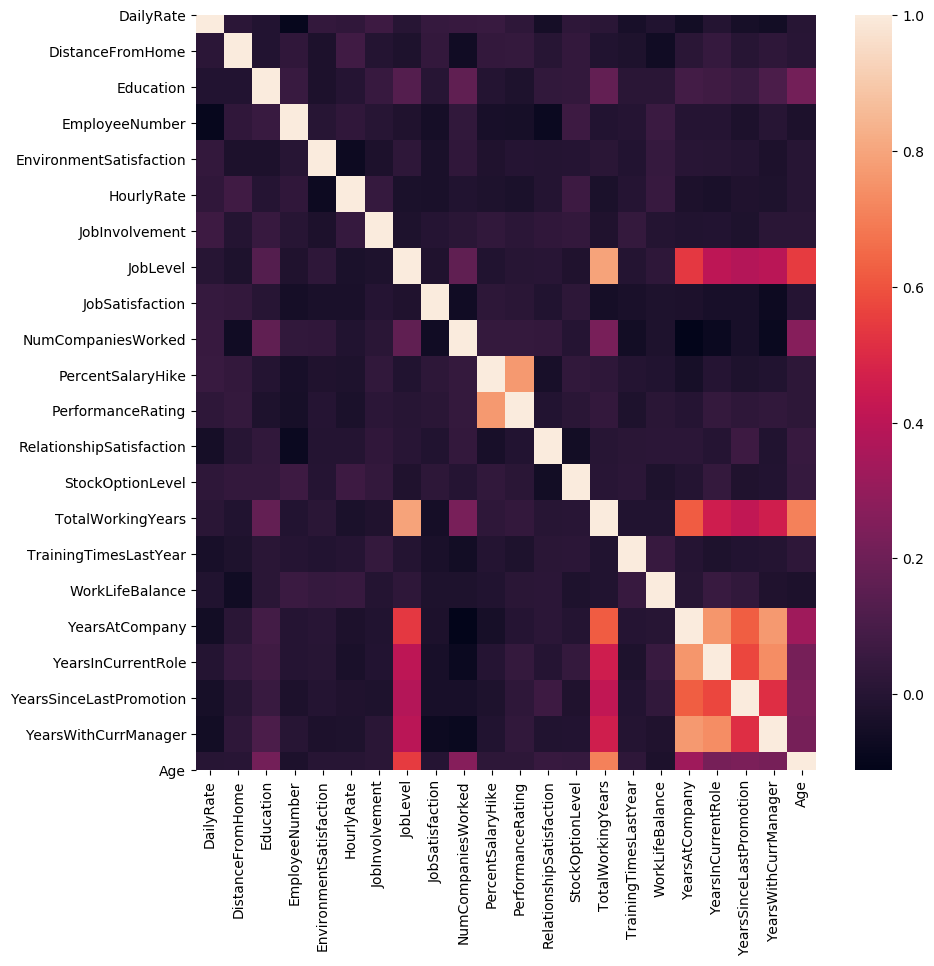

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(hr_data_num.corr())

In [12]:

#Let's remove the strongly correlated variables
hr_data_uc = hr_data_num[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()

hr_data_uc.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,31,1003,5,1,51,3,2,3,3,1,3
1,24,984,17,4,97,3,1,2,1,1,3
2,43,589,14,2,94,3,4,1,3,1,3
3,33,575,25,4,44,2,2,2,4,0,2
4,55,267,13,1,85,4,4,3,3,0,2


In [13]:
#Copy categorical data
hr_data_cat = hr_data[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole','MaritalStatus',
                       'Over18', 'OverTime']].copy()
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Sales,Technical Degree,Male,Sales Executive,Married,Y,No
1,Yes,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No
2,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,Y,No
3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
4,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,Yes


In [14]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,0,Travel_Rarely,Sales,Technical Degree,Male,Sales Executive,Married,Y,No
1,1,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No
2,0,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,Y,No
3,0,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
4,1,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,Yes


In [15]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
3,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,1


In [16]:
hr_data_final = pd.concat([hr_data_num, hr_data_cat], axis=1)
hr_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,31,1003,5,3,1749,1,51,3,2,3,...,0,0,1,0,0,1,0,1,1,0
1,24,984,17,2,1219,4,97,3,1,2,...,0,0,0,0,0,1,0,1,1,0
2,43,589,14,2,843,2,94,3,4,1,...,1,0,0,0,0,1,0,1,1,0
3,33,575,25,3,1545,4,44,2,2,2,...,0,0,0,0,0,0,1,1,1,0
4,55,267,13,4,1372,1,85,4,4,3,...,0,0,1,0,0,0,1,1,0,1


In [17]:
from sklearn.model_selection import train_test_split

target = hr_data_final['Attrition']
features = hr_data_final.drop('Attrition', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


In [19]:
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [21]:
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 3)
CV_model.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [22]:
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [24]:
model1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=6, criterion='gini')

In [25]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
from sklearn.metrics import accuracy_score
test_pred = model1.predict(X_test)
accuracy_score(y_test, test_pred)

0.84375

Confusion matrix:
 [[269   0]
 [ 50   1]]


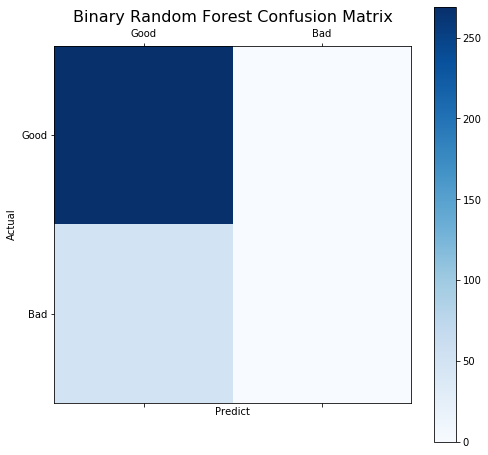

In [37]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, model1.predict(X_test))
print('Confusion matrix:\n', conf_mat) 

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues) 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.title('Binary Random Forest Confusion Matrix',fontsize=16) 
plt.xlabel('Predict') 
plt.ylabel('Actual') 
plt.show()

In [32]:
from sklearn.model_selection import validation_curve

train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = np.arange(1, 50), cv = 5)


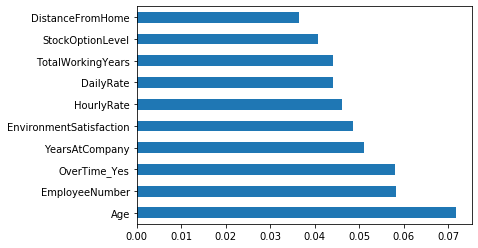

In [34]:
feat_importances = pd.Series(model1.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')